# Primeiro gráfico

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

Comando acima: Imagens geradas pelo medplotlib devem ser mostradas no notebook

In [5]:
categorias= ['A', 'B', 'C', 'D']

In [6]:
valores= [10, 20, 15, 5]

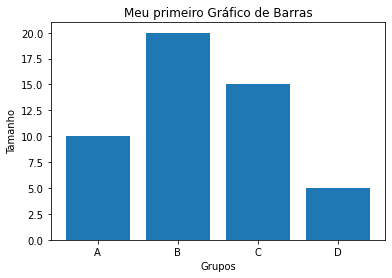

In [7]:
plt.bar(categorias, valores)
plt.xlabel('Grupos')
plt.ylabel('Tamanho')
plt.title('Meu primeiro Gráfico de Barras')
plt.show()

# Leitura de dados em JSON

In [8]:
filmes_uri = 'https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json'

In [9]:
filmes = pd.read_json(filmes_uri)

In [10]:
filmes.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


In [11]:
filmes.describe()

,Year,Worldwide_Gross_M,Budget_M
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


In [12]:
contagensGenre= filmes.groupby(by='Genre').count()

In [13]:
contagensGenre

,Film,Year,Worldwide_Gross_M,Budget_M
Genre,,,,
Action,13,13,13,13
Adventure,4,4,4,4
Animation,8,8,8,8
Drama,2,2,2,2
Fantasy,1,1,1,1
Romance,1,1,1,1
Thriller,1,1,1,1


# Gerando Gráfico dos Genres

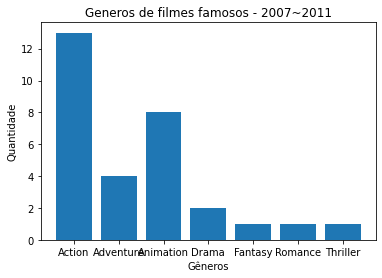

In [14]:
plt.bar(contagensGenre.index, contagensGenre['Film'])
plt.xlabel('Gêneros')
plt.ylabel('Quantidade')
plt.title('Generos de filmes famosos - 2007~2011')
plt.show()

# Mesmo gráfico com o Seaborn

Set preciva vir primeiro para configurar o restante do código;
Styles possíveis: 'darkgrid', 'whitegrid', 'dark', 'white' e 'ticks';
A função countplot() gera a visualização em si, contando o número de elementos de um determinado grupo;
Neste exemplo, ela recebe dois argumentos. Um é o parâmetro x, ou seja, o eixo horizontal, que recebe o valor 'Genre', que corresponde a coluna de gêneros cinematográficos dos nossos dados. Isso significa dizer que cada barra, alinhadas no eixo x, irão corresponder a um gênero. O outro parâmetro é data (do inglês, dados), que recebe a variável onde está armazenado o conjunto de dados.

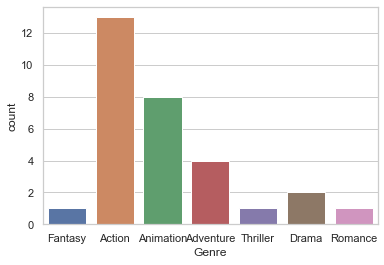

In [15]:
sns.set(style="whitegrid")
sns.countplot(x="Genre", data=filmes)
plt.show()

# Incrementando

Adicionado tamanho: plt.figure(figsize=(10,5))

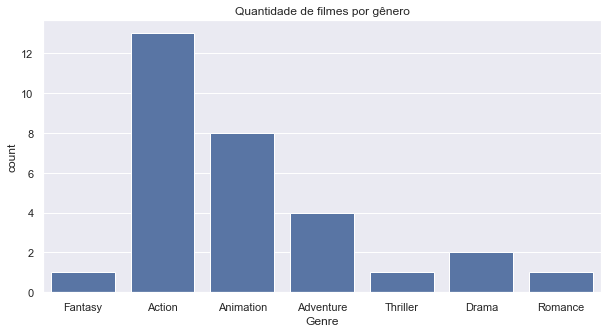

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plt.title('Quantidade de filmes por gênero')
sns.countplot(x="Genre", color = 'b', data=filmes)
plt.show()

Mudando a representação para o eixo do y

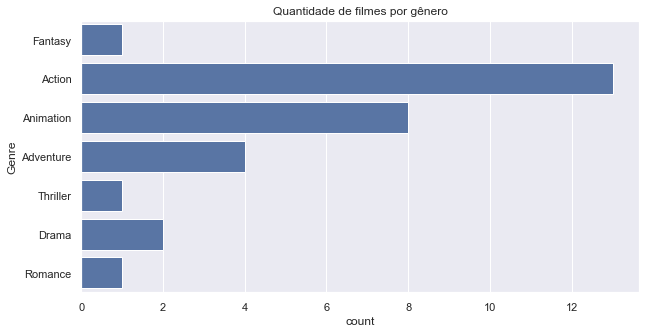

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plt.title('Quantidade de filmes por gênero')
sns.countplot(y="Genre", color = 'b', data=filmes)
plt.show()

# Vinculando duas variáveis - usar barplot()

O parâmetro x recebe a categoria que cada barra irá representar, enquanto o parâmetro y recebe o valor de bilheteria. Será então calculada a média das bilheterias por gênero, e esse valor será mapeado no eixo y;
Um novo parâmetro chamado ci (confidence interval) foi utilizado, recebendo o valor 'sd' (standard deviation, o desvio padrão). Por padrão, o parâmetro ci é usado para estimar intervalos de confiança, um intervalo estatístico onde provavelmente se encontra um valor desconhecido. Neste caso, passando o valor ‘sd’, ao invés de intervalo de confiança, é calculado o já conhecido desvio padrão, que indica como os dados se dispersam ao redor da média. O desvio padrão é representado pela linha escura no centro das barras.

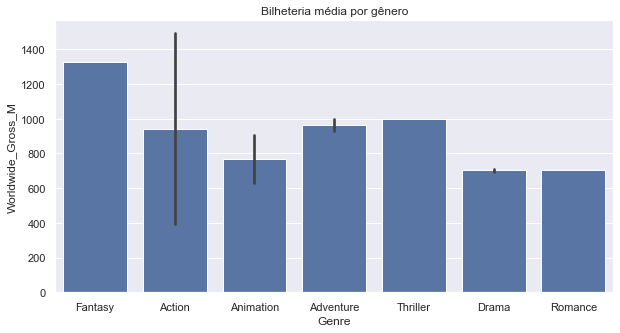

In [18]:
plt.figure(figsize=(10,5))
plt.title('Bilheteria média por gênero')
sns.barplot(x="Genre", y="Worldwide_Gross_M", color = 'b', ci = 'sd', data=filmes)
plt.show()

Agora o somatório dos valores por gênero;
Cuidado com conclusões precipitadas: a média (gráfico acima) diz mais, afinal estamos trabalhando com quantidades diferentes de filmes por gênero.

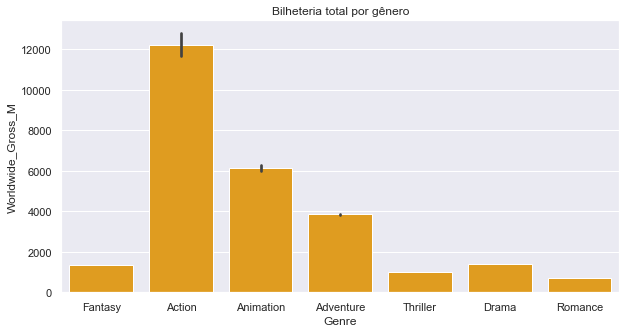

In [19]:
plt.figure(figsize=(10,5))
plt.title('Bilheteria total por gênero')
sns.barplot(x="Genre", y="Worldwide_Gross_M", color = 'orange', estimator = sum, ci = 'sd', data=filmes)
plt.show()

# Gráficos de barras com barras agrupadas 

Basta atribuir uma categoria ao parâmetro hue nas funções que você já utilizou. Hue significa matiz de uma cor. Ou seja, a nova categoria será mapeada na cor das barras.

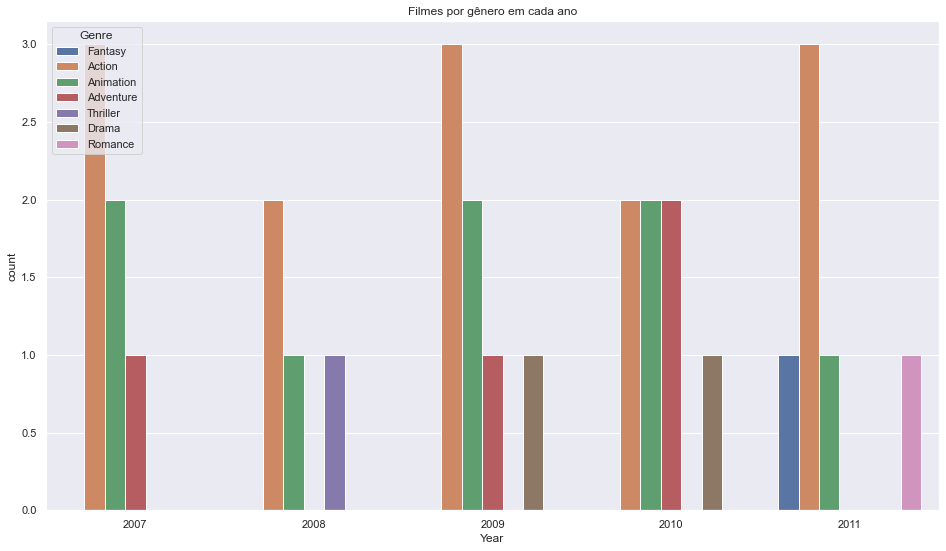

In [20]:
plt.figure(figsize=(16,9))
plt.title('Filmes por gênero em cada ano')
sns.countplot(x="Year", hue='Genre', data=filmes)
plt.show()

# Vinculando duas variáveis com barras agrupadas - usar barplot()

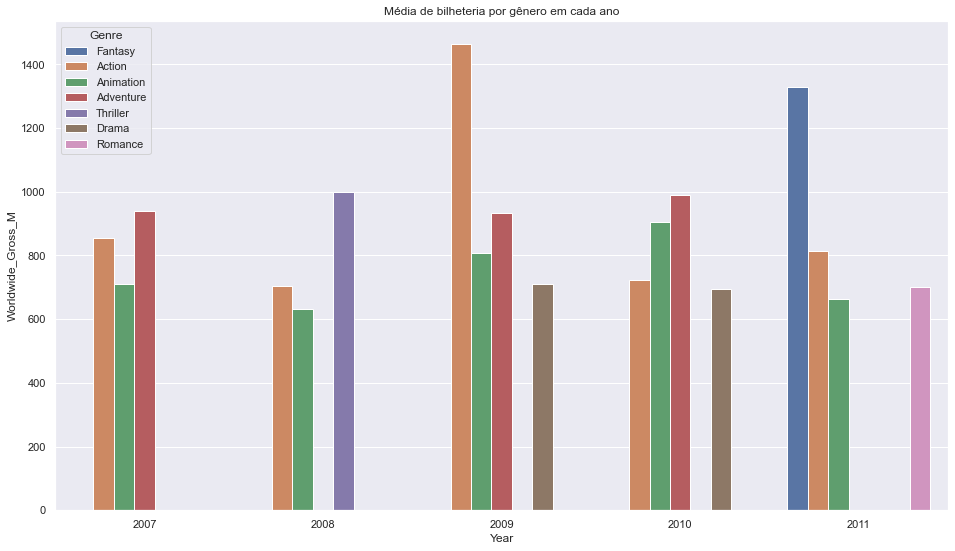

In [21]:
plt.figure(figsize=(16,9))
plt.title('Média de bilheteria por gênero em cada ano')
sns.barplot(x="Year", y='Worldwide_Gross_M', ci=None, hue='Genre', data=filmes)
plt.show()

# Customizações

Na linha 2, foi passado o valor ‘pastel’ para o parâmetro palette, resultando em tons pastéis. Você pode conhecer as diversas opções de paleta consultando este link: https://seaborn.pydata.org/tutorial/color_palettes.html;
Também foi passado o valor 0.4 para o atributo edgecolor, que configura a cor do contorno das barras. Quanto mais próximo de 0, mais preto fica e quanto mais próximo de 1, mais branco. Teste alterar esse valor;

Documentação do seaborn:
https://seaborn.pydata.org/api.html

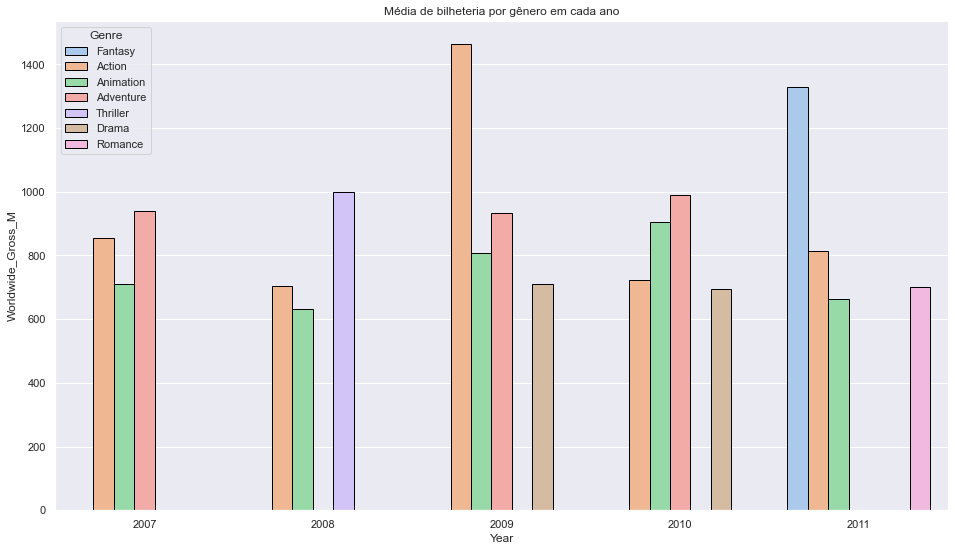

In [22]:
plt.figure(figsize=(16,9))
plt.title('Média de bilheteria por gênero em cada ano')
sns.barplot(x="Year", y='Worldwide_Gross_M', ci=None, hue='Genre', palette= 'pastel', edgecolor='0', data=filmes)
plt.show()

# Salvando os gráficos

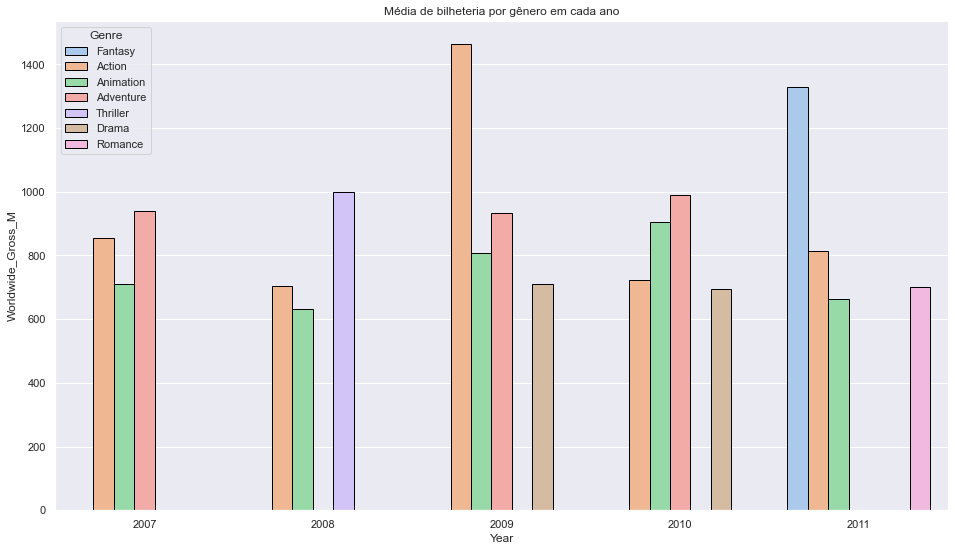

In [23]:
plt.figure(figsize=(16,9))
plt.title('Média de bilheteria por gênero em cada ano')
sns.barplot(x="Year", y='Worldwide_Gross_M', ci=None, hue='Genre', palette= 'pastel', edgecolor='0', data=filmes)
plt.savefig('Média de bilheteria por gênero em cada ano.png')